# Dataset open access link:

(I have chosen the dataset about red wine)

https://archive.ics.uci.edu/dataset/186/wine+quality

# Student number: 220656407

# Libraries and Dataset import (Classification task)

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report

In [108]:
file_path = "winequality-red.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, sep=';')

# Analysis and Visualization

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

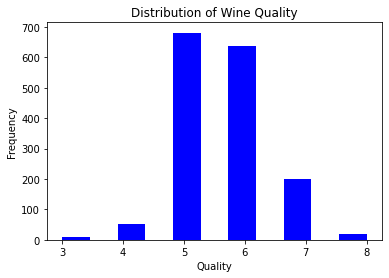

In [109]:
print(df.head())
print('')
print('-----------------------------------------------------------------------------')
print('')
print(df.info())
print('')
print('-----------------------------------------------------------------------------')
print('')
print(df.describe())
print('')
print('-----------------------------------------------------------------------------')
print('')
print(df.isnull().sum())
print('')
print('-----------------------------------------------------------------------------')
print('')


df['quality'].hist(bins=11, grid=False, color='blue')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

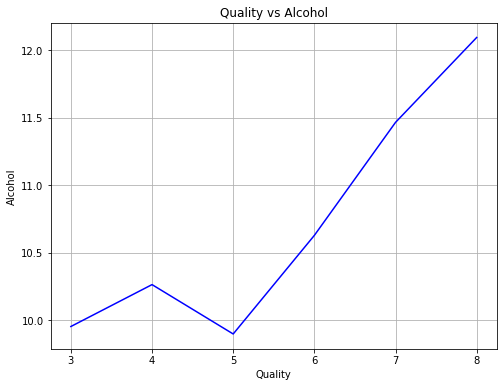

In [110]:
# Plotting
plt.figure(figsize=(8, 6))
sns.lineplot(y='alcohol', x='quality', data=df, ci=None, color='blue')
plt.title('Quality vs Alcohol')
plt.ylabel('Alcohol')
plt.xlabel('Quality')
plt.grid(True)
plt.show()

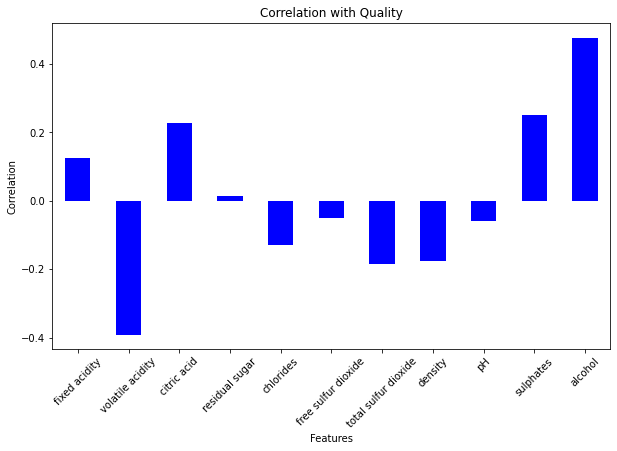

In [111]:
corr_with_quality = df.corr()['quality'].drop('quality')

# Plotting correlation with respect to "quality"
plt.figure(figsize=(10, 6))
corr_with_quality.plot(kind='bar', color='blue')
plt.title('Correlation with Quality')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

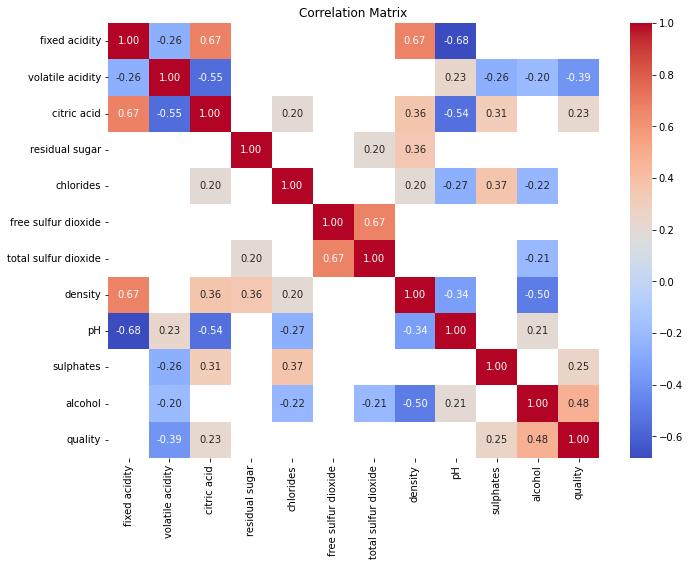

In [112]:
corr_matrix = df.corr()

threshold = 0.2

# Replacing values below the threshold with NaN
masked_corr_matrix = corr_matrix.mask(np.abs(corr_matrix) < threshold)

# Ploting the correlation matrix
plt.figure(figsize=(11, 8))
sns.heatmap(masked_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Unsupervised learning: PCA, StandardScaler
# Data preprocessing

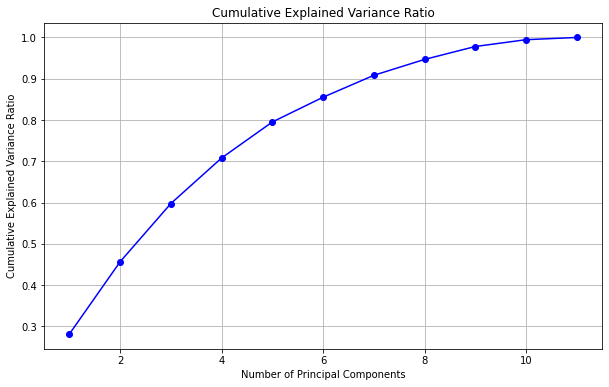

In [113]:
data = df
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('quality', axis = 1))
pca = PCA()
data_pca = pca.fit_transform(data_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [114]:
# Extract features and target variable
X = data.drop(columns=['quality'])  #'quality' is the target column
y = data['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

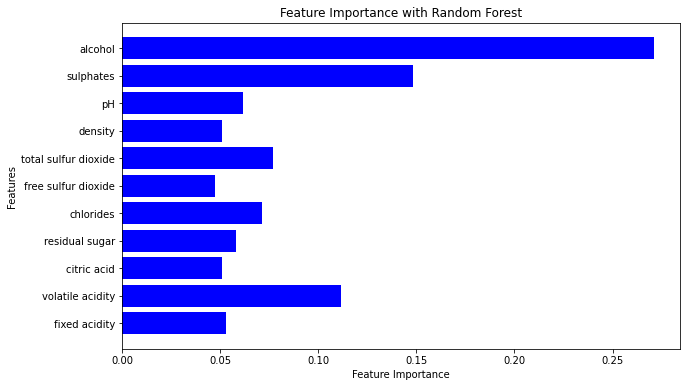

In [115]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(range(len(feature_importances)), feature_importances, align='center', color='blue')
plt.yticks(range(len(feature_importances)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance with Random Forest')
plt.show()

In [116]:
scaler = StandardScaler()
data = df
data_scaled = scaler.fit_transform(data.drop('quality', axis = 1))

n_components = 8
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

principal_components = ['PC'+str(i) for i in range(1, n_components+1)]
data_transformed = pd.DataFrame(data=data_pca, columns=principal_components)

final_data = pd.concat([data_transformed, data['quality']], axis=1)
data = final_data

In [117]:
# Extract features and target variable
X = final_data.drop(columns=['quality'])  #'quality' is the target column
y = final_data['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

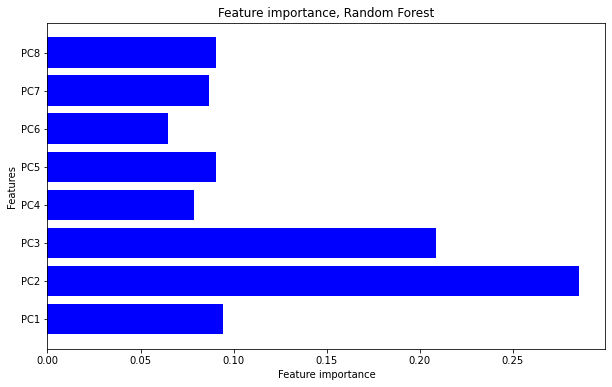

In [118]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(range(len(feature_importances)), feature_importances, align='center', color='blue')
plt.yticks(range(len(feature_importances)), X.columns)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('Feature importance, Random Forest')
plt.show()

In [119]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Taking the features from the dataset, Taking PC2 as it is shown above as the most important
X = data[['PC2']].values

# Defineing the degree
degree = 2
# Creating PolynomialFeatures
poly = PolynomialFeatures(degree=degree, include_bias=False)  

# Making features into polynomial ones
X_poly = poly.fit_transform(X)

# Creating names
poly_feature_names = [f'alcohol_{i}' for i in range(1, X_poly.shape[1] + 1)]

# Making the polynomial features into DataFrame
poly_features = pd.DataFrame(X_poly, columns=poly_feature_names)

# Joining the polynomial features with the initial dataset
data_poly = pd.concat([data, poly_features], axis=1)

# Displaying the dataset
print(data_poly.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   

        PC8  quality  alcohol_1  alcohol_2  
0 -0.282258        5   0.450950   0.203356  
1  0.762587        5   1.856553   3.446789  
2  0.597946        5   0.882039   0.777993  
3 -0.455375        6  -0.269976   0.072887  
4 -0.282258        5   0.450950   0.203356  


In [120]:
data_poly = data_poly.drop('alcohol_1', axis = 1)
data_poly

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,quality,alcohol_2
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,5,0.203356
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,5,3.446789
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,5,0.777993
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,6,0.072887
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,5,0.203356
...,...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,5,0.663062
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,6,0.797630
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,6,0.097185
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,5,0.959991


In [121]:
# Defineing a function to filter outliers using IQR
def filter_outliers_iqr(df, threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

# Filtering outliers using IQR
data_filtered = filter_outliers_iqr(data)

# Displaying the filtered dataset
print(data_filtered.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   

        PC8  quality  
0 -0.282258        5  
1  0.762587        5  
2  0.597946        5  
3 -0.455375        6  
4 -0.282258        5  


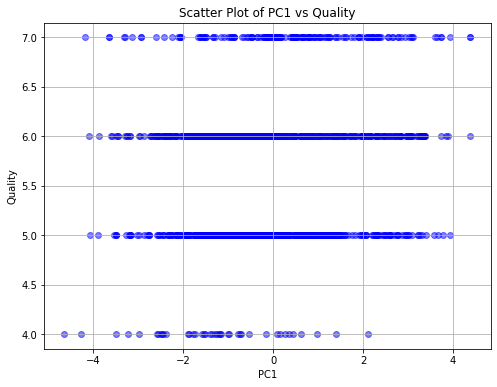

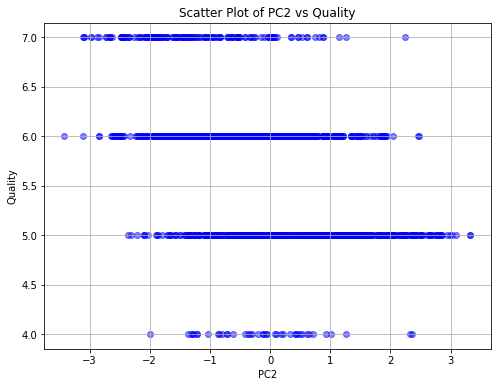

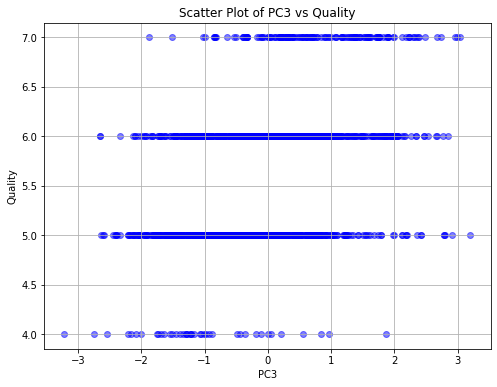

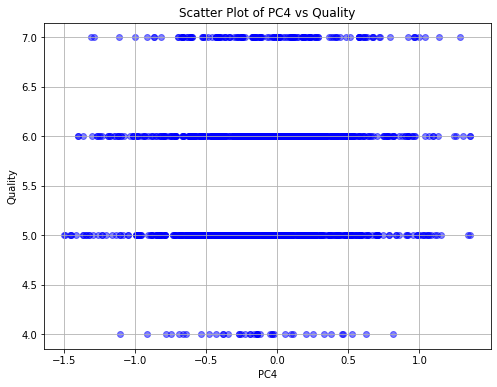

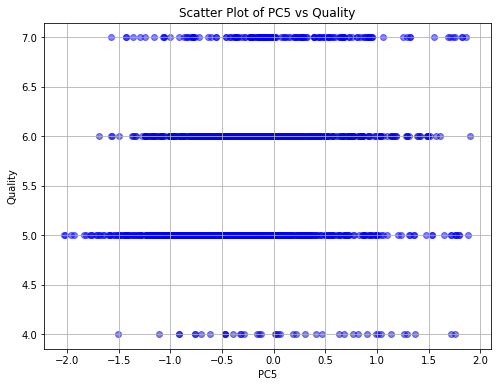

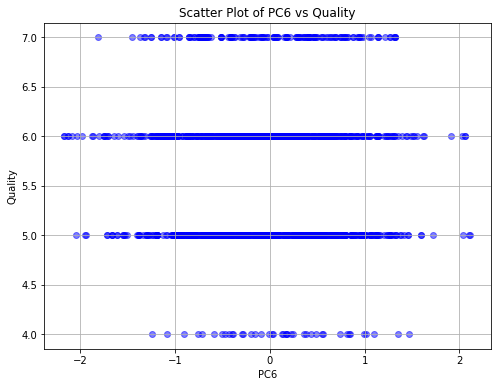

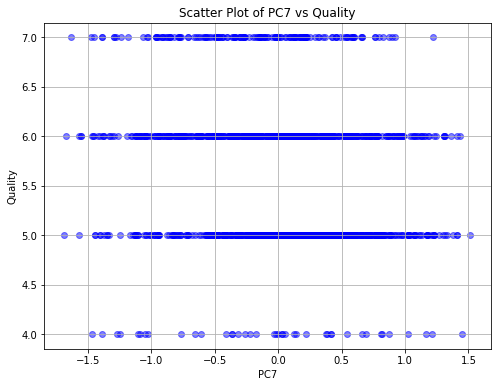

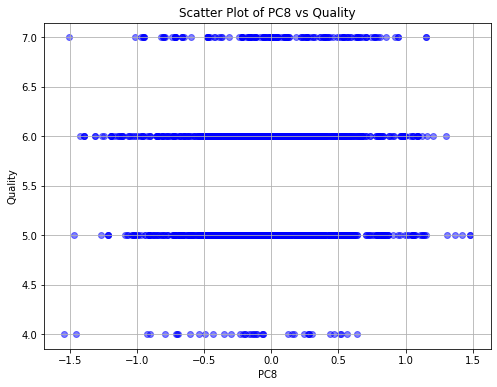

In [122]:
# All features except 'quality' list
variables = data_filtered.columns[data_filtered.columns != 'quality']

# Scatter plot for all features with 'quality'
for variable in variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(data_filtered[variable], data_filtered['quality'], alpha=0.5, color='blue')
    plt.title(f'Scatter Plot of {variable} vs Quality')
    plt.xlabel(variable)
    plt.ylabel('Quality')
    plt.grid(True)
    plt.show()


In [123]:
# Extracting features and target variable
X = data_filtered.drop(columns=['quality'])  #'quality' is the target column
y = data_filtered['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model usage and hyperparameters tuning

In [124]:
# Creating KNN model
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

# Fitting the model
knn_model.fit(X_train, y_train)

# Making predictions
y_pred = knn_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6148148148148148


In [163]:
# Defining the parameter grid for KNN
param_grid_knn = {'n_neighbors': [5, 10, 15, 20],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Initializing KNN model
knn = KNeighborsClassifier()

# Initializing GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search_knn.fit(X_train, y_train)

# Printing the best parameters found
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Computing accuracy score using the best estimator on test data
accuracy = grid_search_knn.best_estimator_.score(X_test, y_test)
print("Accuracy Score on Test Data:", accuracy)


Best Parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}
Accuracy Score on Test Data: 0.7148148148148148


In [157]:
# Creating KNN model
k = 20
knn_model = KNeighborsClassifier(n_neighbors=k, algorithm = 'auto', weights = 'distance')

# Fitting the model
knn_model.fit(X_train, y_train)

# Making predictions
y_pred = knn_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7148148148148148


In [127]:
# Createing SGD model
sgd_model = SGDClassifier()

# Fitting the model
sgd_model.fit(X_train, y_train)

# Making predictions
y_pred = sgd_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5962962962962963


In [128]:
# Initializing Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()

# Training Gradient Boosting Classifier model
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluating Gradient Boosting Classifier model
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier:
Accuracy: 0.6888888888888889
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.71      0.82      0.76       120
           6       0.68      0.67      0.68       107
           7       0.67      0.55      0.60        29

    accuracy                           0.69       270
   macro avg       0.51      0.51      0.51       270
weighted avg       0.65      0.69      0.67       270



In [129]:
# Defining the parameter grid for gradient boosting
param_grid_gb = {'n_estimators': [50, 100, 150],
                 'learning_rate': [0.01, 0.1, 0.2],
                 'max_depth': [3, 4, 5]}

# Initializing gradient boosting model
gb = GradientBoostingClassifier()

# Initializing GridSearchCV for gradient boosting
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search_gb.fit(X_train, y_train)

# Printing the best parameters found
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Computing accuracy score using the best estimator on test data
accuracy = grid_search_gb.best_estimator_.score(X_test, y_test)
print("Accuracy Score on Test Data:", accuracy)


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy Score on Test Data: 0.7


In [130]:
# Initializing Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 4, n_estimators = 50)

# Training Gradient Boosting Classifier model
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluating Gradient Boosting Classifier model
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier:
Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.70      0.82      0.76       120
           6       0.69      0.69      0.69       107
           7       0.76      0.55      0.64        29

    accuracy                           0.70       270
   macro avg       0.54      0.52      0.52       270
weighted avg       0.67      0.70      0.68       270



In [131]:
# Initializing SVM model
svm_model = SVC()

# Training SVM model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM model
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))



Support Vector Machine:
Accuracy: 0.6555555555555556
Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00        14
           5       0.68      0.78      0.73       120
           6       0.62      0.67      0.64       107
           7       0.71      0.41      0.52        29

    accuracy                           0.66       270
   macro avg       0.75      0.47      0.47       270
weighted avg       0.68      0.66      0.63       270



In [146]:
# Define the parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 2, 0.9, 1.5],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['auto']}

# Initialize SVM model
svm = SVC()

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search_svm.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Compute accuracy score using the best estimator on test data
accuracy = grid_search_svm.best_estimator_.score(X_test, y_test)
print("Accuracy Score on Test Data:", accuracy)


Best Parameters for SVM: {'C': 1.5, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy Score on Test Data: 0.6703703703703704


In [147]:
# Initializing SVM model
svm_model = SVC(C = 1.5, gamma = 'auto', kernel = 'rbf')

# Training SVM model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM model
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))


Support Vector Machine:
Accuracy: 0.6703703703703704
Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00        14
           5       0.69      0.79      0.74       120
           6       0.63      0.68      0.66       107
           7       0.72      0.45      0.55        29

    accuracy                           0.67       270
   macro avg       0.76      0.48      0.49       270
weighted avg       0.69      0.67      0.65       270



In [148]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))


Random Forest:
Accuracy: 0.674074074074074
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      1.00        14
           5       0.71      0.76      0.73       120
           6       0.64      0.71      0.68       107
           7       0.68      0.52      0.59        29

    accuracy                           0.67       270
   macro avg       0.51      0.50      0.75       270
weighted avg       0.64      0.67      0.71       270



In [135]:
# Defininh the parameter grid for random forest
param_grid_rf = {'n_estimators': [100, 190, 200, 210],
                 'max_depth': [None, 10, 15, 20],
                 'min_samples_split': [3, 2, 4],
                 'min_samples_leaf': [1, 2, 3]}

# Initializing random forest model
random_forest = RandomForestClassifier()

# Initializing GridSearchCV for random forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)

# Printing the best parameters found
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Computing accuracy score using the best estimator on test data
accuracy = grid_search_rf.best_estimator_.score(X_test, y_test)
print("Accuracy Score on Test Data:", accuracy)


Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy Score on Test Data: 0.7111111111111111


In [151]:
random_forest = RandomForestClassifier(max_depth = 15, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))



Random Forest:
Accuracy: 0.7074074074074074
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      1.00        14
           5       0.75      0.78      0.76       120
           6       0.68      0.78      0.72       107
           7       0.67      0.48      0.56        29

    accuracy                           0.71       270
   macro avg       0.52      0.51      0.76       270
weighted avg       0.67      0.71      0.74       270



In [137]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.6370370370370371
Classification Report:
              precision    recall  f1-score   support

           4       0.20      0.07      0.11        14
           5       0.70      0.71      0.70       120
           6       0.62      0.68      0.65       107
           7       0.52      0.45      0.48        29

    accuracy                           0.64       270
   macro avg       0.51      0.48      0.48       270
weighted avg       0.62      0.64      0.63       270



In [138]:
logistic_regression = LogisticRegression(max_iter = 1000)

logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=1))

Logistic Regression:
Accuracy: 0.6259259259259259
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      1.00        14
           5       0.67      0.77      0.71       120
           6       0.59      0.62      0.60       107
           7       0.58      0.38      0.46        29

    accuracy                           0.63       270
   macro avg       0.46      0.44      0.69       270
weighted avg       0.59      0.63      0.66       270



In [139]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for logistic regression
param_grid_lr = {'C': [0.001, 0.01, 1, 10, 100]}

# Initializing logistic regression model
logistic_regression = LogisticRegression(max_iter=10000)

# Initializing GridSearchCV for logistic regression
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_lr, cv=5, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search_lr.fit(X_train, y_train)

# Printing the best parameters found
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)


Best Parameters for Logistic Regression: {'C': 10}


In [153]:
logistic_regression = LogisticRegression(C = 10, max_iter = 1000)

logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=1))

Logistic Regression:
Accuracy: 0.6259259259259259
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      1.00        14
           5       0.67      0.77      0.71       120
           6       0.59      0.62      0.60       107
           7       0.58      0.38      0.46        29

    accuracy                           0.63       270
   macro avg       0.46      0.44      0.69       270
weighted avg       0.59      0.63      0.66       270



# Final results of models performance

In [167]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Stochastic Gradient Descent', SGDClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Train and evaluate each model
for name, model in models:
    print(f"\n{10*'='} {name} {10*'='}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score on Test Data:", accuracy)


========== Logistic Regression ==========
Accuracy Score on Test Data: 0.6259259259259259

========== Decision Tree ==========
Accuracy Score on Test Data: 0.6518518518518519

========== Random Forest ==========
Accuracy Score on Test Data: 0.7222222222222222

========== Support Vector Machine ==========
Accuracy Score on Test Data: 0.6555555555555556

========== K-Nearest Neighbors ==========
Accuracy Score on Test Data: 0.6148148148148148

========== Stochastic Gradient Descent ==========
Accuracy Score on Test Data: 0.5148148148148148

========== Gradient Boosting ==========
Accuracy Score on Test Data: 0.674074074074074


In [160]:
models = [
    ('Logistic Regression', LogisticRegression(C = 100, max_iter = 1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(max_depth = 15 , min_samples_leaf = 1, min_samples_split = 3, n_estimators = 190)),
    ('Support Vector Machine', SVC(C = 1, gamma = 'auto', kernel = 'rbf')),
    ('K-Nearest Neighbors', KNeighborsClassifier(algorithm = 'auto', n_neighbors= 20, weights = 'distance')),
    ('Stochastic Gradient Descent', SGDClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate = 0.2, max_depth = 4, n_estimators = 50))
]

# Train and evaluate each model
for name, model in models:
    print(f"\n{10*'='} {name} {10*'='}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score on Test Data:", accuracy)


========== Logistic Regression ==========
Accuracy Score on Test Data: 0.6259259259259259

========== Decision Tree ==========
Accuracy Score on Test Data: 0.6444444444444445

========== Random Forest ==========
Accuracy Score on Test Data: 0.7296296296296296

========== Support Vector Machine ==========
Accuracy Score on Test Data: 0.6518518518518519

========== K-Nearest Neighbors ==========
Accuracy Score on Test Data: 0.7148148148148148

========== Stochastic Gradient Descent ==========
Accuracy Score on Test Data: 0.5888888888888889

========== Gradient Boosting ==========
Accuracy Score on Test Data: 0.6814814814814815


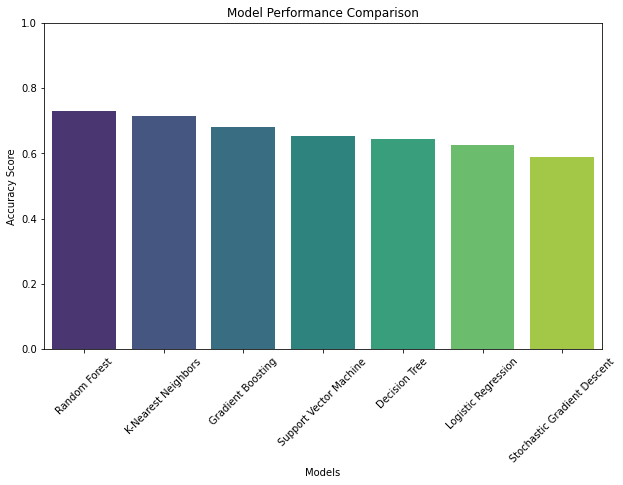

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining models names and their accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 
          'K-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting']
accuracy_scores = [0.6259259259259259, 0.6444444444444445, 0.7296296296296296, 0.6518518518518519, 
                   0.7148148148148148, 0.5888888888888889, 0.6814814814814815]

# Sorting models based on their accuracy scores (from best to worst)
sorted_models = [model for _, model in sorted(zip(accuracy_scores, models), reverse=True)]
sorted_accuracy_scores = sorted(accuracy_scores, reverse=True)

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_models, y=sorted_accuracy_scores, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
